In [83]:

import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [65]:
import pandas as pd
import os 
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.listdir()

['.ipynb_checkpoints', 'text_classification.ipynb', 'Text_Data', 'titanic.csv']

In [5]:
os.chdir('./Text_Data')


In [7]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 0072-AA51

 Directory of C:\Users\sande\Documents\Big_Date\Text_Data

07/09/2019  10:50 PM    <DIR>          .
07/09/2019  10:50 PM    <DIR>          ..
07/09/2019  10:47 PM            32,667 America.txt
07/09/2019  10:49 PM            11,369 Elections.txt
07/09/2019  10:44 PM             7,143 Federer.txt
07/09/2019  10:40 PM             6,460 Ivanovic.txt
07/09/2019  10:46 PM            13,120 Judge.txt
07/09/2019  10:43 PM             6,841 Nadal.txt
               6 File(s)         77,600 bytes
               2 Dir(s)  84,273,324,032 bytes free


In [8]:
for i in os.listdir():
    print(i)

America.txt
Elections.txt
Federer.txt
Ivanovic.txt
Judge.txt
Nadal.txt


In [13]:
file_ob=open('America.txt')
text=file_ob.read()
file_ob.close()

In [ ]:
df=pd.DataFrame()

In [17]:
Data=
{ File_Name: [],
 Content: [],
    Label:[]   
}

In [18]:
File_Name=[i for i in os.listdir()]


In [20]:
Content=[]
for i in os.listdir():
    with open(i) as f:
        text=f.read()
        Content.append(text)

In [44]:
os.listdir()

['America.txt',
 'Elections.txt',
 'Federer.txt',
 'Ivanovic.txt',
 'Judge.txt',
 'Nadal.txt']

In [45]:
Label=['P', 'P', 'S', 'S', 'P', 'S']

In [46]:
Data={'File_Name': File_Name, 
               'Content': Content, 
               'Label':Label}

In [51]:
df=pd.DataFrame(Data, columns=['File_Name', 'Content', 'Label'])

In [55]:
df.head()

,File_Name,Content,Label
0,America.txt,NEW YORK TIMES BLOG\n \nSearch Paul Krugman\n ...,P
1,Elections.txt,Joe Biden’s Tax Returns Show More Than $15 Mil...,P
2,Federer.txt,Wimbledon 2019: Alison Riske Upsets No. 1 Ashl...,S
3,Ivanovic.txt,"Largely Unchallenged, the Big Three Stroll Int...",S
4,Judge.txt,Justice Dept. Watchdog Is Preparing to Deliver...,P


In [76]:
a

346

In [70]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['Content'] = df['Content'].apply(clean_text)


In [71]:
df

,File_Name,Content,Label
0,America.txt,new york times blog search paul krugman search...,P
1,Elections.txt,joe bidens tax returns show 15 million income ...,P
2,Federer.txt,wimbledon 2019 alison riske upsets 1 ashleigh ...,S
3,Ivanovic.txt,largely unchallenged big three stroll wimbledo...,S
4,Judge.txt,justice dept watchdog preparing deliver verdic...,P
5,Nadal.txt,largely unchallenged big three stroll wimbledo...,S


In [80]:
df['Content'].apply(lambda x: len(x.split(' '))).sum()

7250

In [84]:
X = df.Content
y = df.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

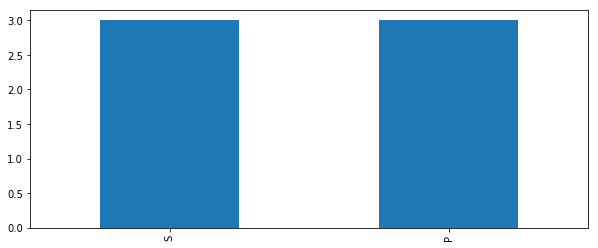

In [90]:
my_tags =['S', 'P']
plt.figure(figsize=(10,4))
df.Label.value_counts().plot(kind='bar');

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

a
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.0
              precision    recall  f1-score   support

           S       0.00      0.00      0.00         2
           P       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         2
   macro avg       0.00      0.00      0.00         2
weighted avg       0.00      0.00      0.00         2



C:\Users\sande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
